In [151]:
#import all the required modules

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [152]:
# get the Titan Dataset

df1 = sns.load_dataset("titanic")

df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: >

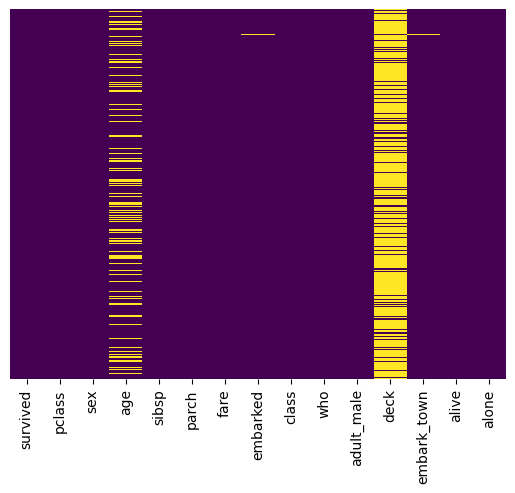

In [153]:
#Check for null values by using heatmap

sns.heatmap(df1.isnull(),cbar=False, cmap="viridis", yticklabels=False)


c:\Users\saras\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: xlabel='class', ylabel='age'>

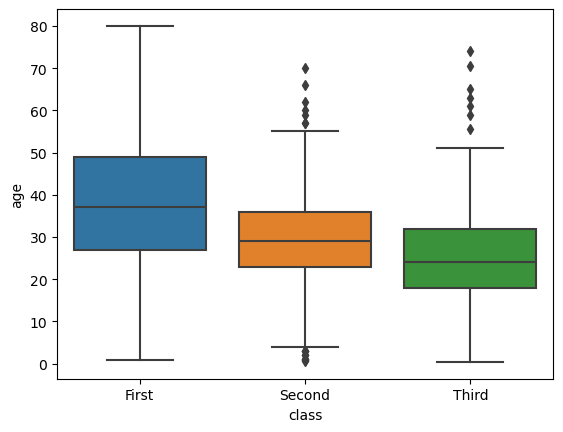

In [154]:
# Thea above data shows "deck" and "age" column has null values
sns.boxplot(data=df1, x="class", y="age")

In [155]:
import plotly.express as px
fig = px.box(df1, x="class", y="age")
fig.show()

In [156]:
#the above boxplot shows the average age for first calss passengers is 37, seconda class is 29 and third class is 24.
# lets fill the average ages to the null values with respective to the class
# create a function to apply it in the each row

def AgeFill(cols):
    if pd.isnull(cols[0]):
        if cols[1]=="First":
            return 37
        elif cols[1]=="Second":
            return 29
        else:
            return 24
    else:
        return cols[0]



In [157]:
df1["age"] = df1[["age","class"]].apply(AgeFill, axis=1)

C:\Users\saras\AppData\Local\Temp\ipykernel_4888\2286378868.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\saras\AppData\Local\Temp\ipykernel_4888\2286378868.py:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\saras\AppData\Local\Temp\ipykernel_4888\2286378868.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\saras\AppData\Local\Temp\ipykernel_4888\2286378868.py:9: FutureWarning:

Series.__getitem_

<Axes: >

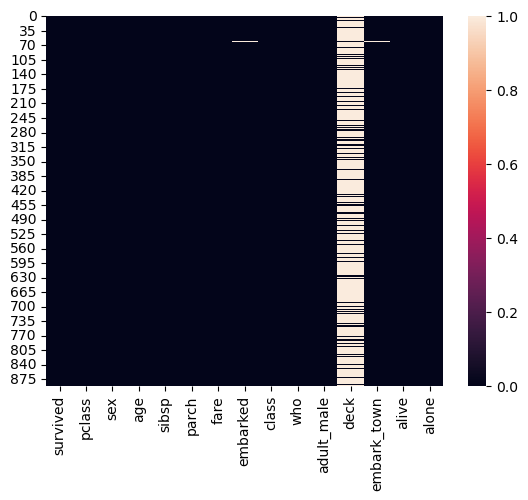

In [158]:
#check if the null vaues in the age column has been filled using heatmap
sns.heatmap(df1.isnull())



In [159]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [160]:
#Remove Deck column
df1.drop(columns="deck", inplace=True)

<Axes: >

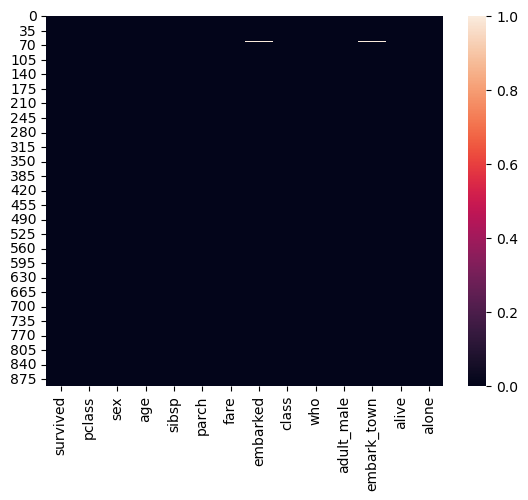

In [161]:
sns.heatmap(df1.isnull())

In [162]:
df1.dropna(inplace=True)

<Axes: >

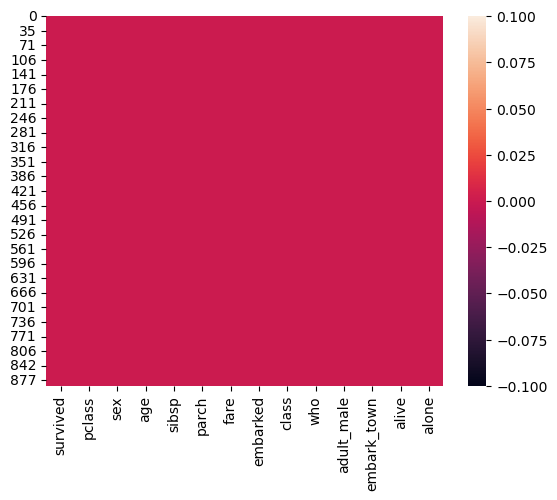

In [163]:
sns.heatmap(df1.isnull())

In [164]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [165]:
mf = pd.get_dummies(df1["sex"], drop_first=True)

In [166]:
pd.concat([df1,mf], axis=1)
df1.drop("sex", axis=1)

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,24.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [167]:
Surv = pd.get_dummies(df1["alive"], drop_first=True)

In [168]:
pd.concat([df1,Surv], axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,yes
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,True
888,0,3,female,24.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,True


In [169]:
df1.rename(columns={"yes":"Survived"})

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,24.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [170]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [171]:
df1.drop(["alive", "embark_town"], axis=1, inplace=True)

In [172]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [173]:
sex = pd.get_dummies(df1["sex"], drop_first=True)

In [174]:
df1 = pd.concat([df1,sex], axis=1)
df1.drop(columns=df1.columns[12], axis=1)
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone,male
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True,True


In [175]:
df1.drop(columns=["sex","embarked"], inplace=True)

In [176]:
df1.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,alone,male
0,0,3,22.0,1,0,7.2500,Third,man,True,False,True
1,1,1,38.0,1,0,71.2833,First,woman,False,False,False
2,1,3,26.0,0,0,7.9250,Third,woman,False,True,False
3,1,1,35.0,1,0,53.1000,First,woman,False,False,False
4,0,3,35.0,0,0,8.0500,Third,man,True,True,True


In [177]:
df1.drop(columns=["fare","who","class"], inplace=True)

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [179]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns="survived"), df1["survived"], test_size=0.33, random_state=42)

In [180]:
ModelL = LogisticRegression()

In [181]:
ModelL.fit(X_train, y_train)

LogisticRegression()

In [183]:
prediction = ModelL.predict(X_test)

In [184]:
from sklearn.metrics import classification_report

In [185]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       184
           1       0.77      0.75      0.76       110

    accuracy                           0.82       294
   macro avg       0.81      0.80      0.81       294
weighted avg       0.82      0.82      0.82       294



In [200]:
#creatint a dataframe with columns test, predicted and if it is correctly predicted


In [193]:
df2 = pd.DataFrame(prediction)

In [196]:
df2["TestData"]= y_test.values

In [197]:
df2

,0,TestData
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
289,0,0
290,0,0
291,1,1
292,1,1


In [198]:
df2 = df2.rename(columns={0:"Predictions","Test":"Actual Data"})

In [199]:
df2

,Predictions,TestData
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
289,0,0
290,0,0
291,1,1
292,1,1


In [201]:
def Compare(cols):

    if cols[0]==cols[1]:
        return True
    else:
        return False

In [203]:
df2["Result"]=df2[["Predictions","TestData"]].apply(lambda x : x[0]==x[1], axis=1)

C:\Users\saras\AppData\Local\Temp\ipykernel_4888\3355071926.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [204]:
df2.head()

,Predictions,TestData,Result
0,0,0,True
1,1,1,True
2,1,1,True
3,0,0,True
4,1,1,True


<Axes: xlabel='Result', ylabel='count'>

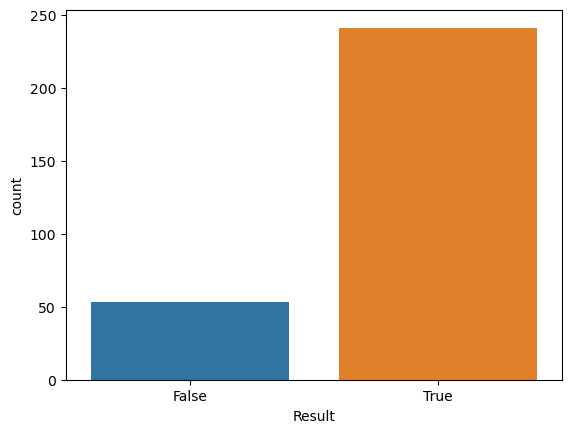

In [212]:

sns.countplot(df2,x="Result")
#got approx 250 correct prediction and 50 incorrect predictions